# Lecture 3 Colaboratryを用いた事例紹介
ここでは、データサイエンスにおける典型的な流れを、体験します。個別のデータ処理、可視化、分析手法は第３回以降の講義から詳しくのべますが。ここでは事例や、大きな流れを体感してもらいます。

後で振り返ったりするのに役立ちます。

## CRISP-DM(CRoss-Industry Standard Process for Data Mining)より

https://medium.com/mlearning-ai/crisp-dm-methodology-with-python-model-deployment-using-flask-included-classification-case-33b9e184f4e7

第１回講義で紹介した、典型的なデータ分析手法の一つである「データマイニングのための業界横断標準プロセス(CRISP-DM)方法論」に従った事例を追ってみます。ビジネスの理解、データ準備と説明データ分析(EDA)、モデリング、評価、展開、保守、監視を含む6つのフェーズで構成されています。

例題として、KaggleのEコマース配送データを使用します。 

![CRISP-DM](https://raw.githubusercontent.com/miwamasa/Lecture2023/main/slides/slidefigures/CRISP-DM.drawio.svg?token=GHSAT0AAAAAAB7S7VMPG7GGT5M2VQAGL6DGZBJEM5A)


## フェーズ 1: ビジネスの理解

分析プロセスを開始する前に、SMART(Specific:具体的、Measurable:測定可能、Actionable:実行可能、Results-oriented:結果指向、Time-bound:期限付き)の目標を設定する必要があります。SMART目標により、ビジネスの観点からプロジェクトの成功を判断するために使用される基準を理解できます


このケーススタディの主な目的は、出荷遅延を特定して削減することにより、顧客の解約率(顧客が競合他社に移動する率)を5か月以内に3%最小限に抑えることです。関連するビジネス上の質問には、「顧客の問い合わせに回答されているか」、「顧客の評価は何でしたか?そして、製品は時間通りに配達されましたか?」、または「製品の重要度が高い場合、製品は時間通りに配達されましたか?」。

目標を実現するには、必要なステップ、制約(モデリングに使用するデータセットのサイズなど)、期限、プロジェクトの遅延や失敗を引き起こす可能性のあるリスク/イベント、および対応する緊急時対応計画。

## フェーズ 2: データ準備/説明データ分析 (EDA)
Eコマース出荷データからデータセットをダウンロードし、ローカルPCに保存します。Jupyter ノートブックを開き、必要なライブラリをインポートします。

###　【ToDo】 Colabへのデータのアップロード
データセットを読み込むには、ダウンロードしたCSVファイルを右クリックし、[コピー]を選択して、コードへのパスを貼り付ける必要があります。通常の文字列を生の文字列に変換するパスの前に置くことを忘れないでください。そうしないと、Unicode エラーが発生する可能性があります

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
ecomm = pd.read_csv(r"./data/Train.csv")

In [6]:
ecomm.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


データの基本的な理解を得るには、関数を使用できます。デフォルトでは、この関数は数値変数の記述統計量を返します。ただし、パラメータとして含めることで、オブジェクトの情報を見つけることができます

In [9]:
ecomm[['Customer_care_calls','Customer_rating', 'Cost_of_the_Product','Prior_purchases',
  'Discount_offered', 'Weight_in_gms']].describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000


In [10]:
ecomm.describe(include='object')

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
count,10999,10999,10999,10999
unique,5,3,3,2
top,F,Ship,low,F
freq,3666,7462,5297,5545


以下は結果であり、Eコマースの配送データが12列と10,999行で構成されていることを示しています。データの8列は整数形式であり、残りは文字列形式です。また、データのどの列にも欠損値はないと結論付けることもできます(データセットのすべての列で10,999のnull以外)。

In [11]:
ecomm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


ビジュアライゼーションを作成する前に、データセットの各列のデータの種類を理解する必要があります。、、およびの下のデータは数値であり、ヒストグラムを使用してこれらの列の累積頻度分布を調べることができます。

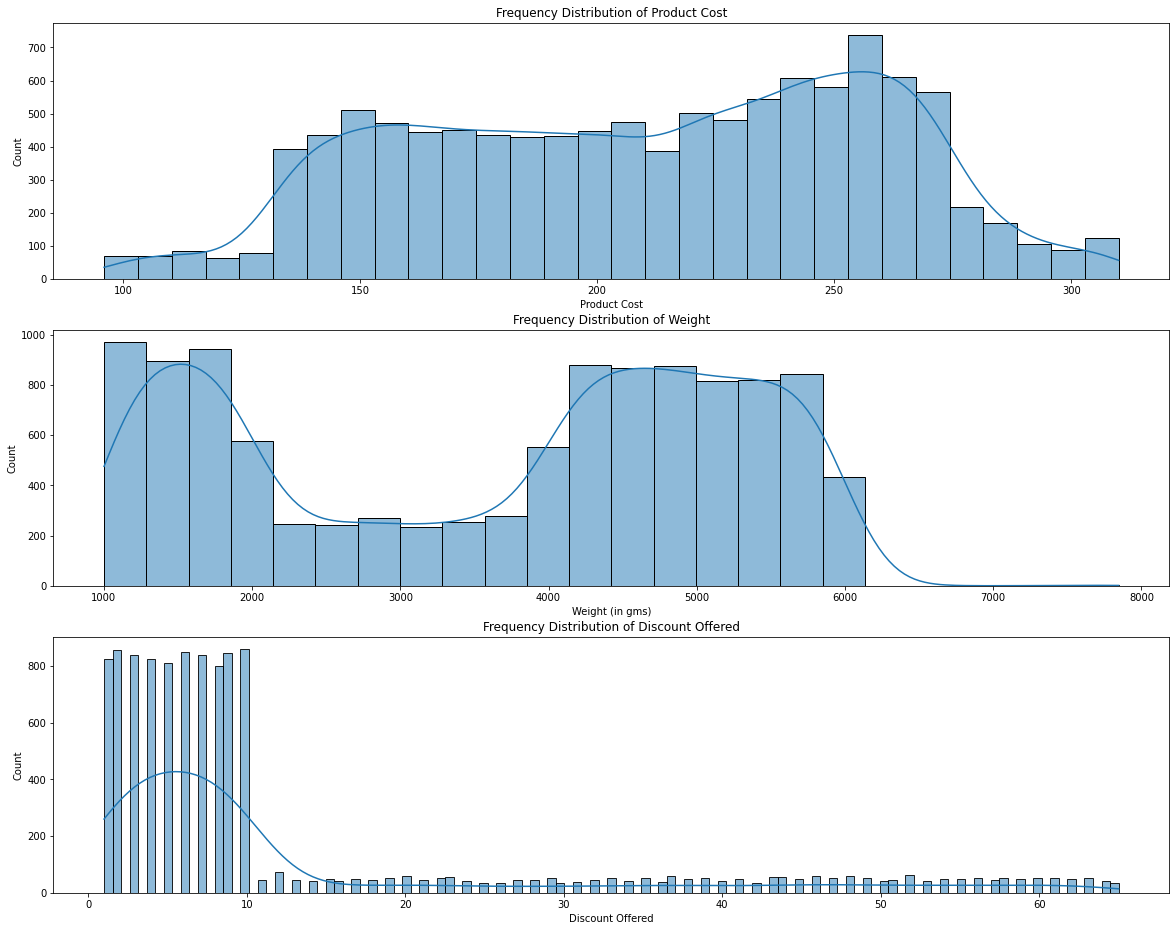

In [13]:
# plotting multiple graphs in a grid
fig, axes = plt.subplots(3,1,figsize=(20,16))

# cumulative frequency distribution for 'Cost_of_the_Product'
sns.histplot(ecomm.Cost_of_the_Product, kde=True, ax=axes[0])
ax=axes[0].set_title('Frequency Distribution of Product Cost',fontsize=12)
ax=axes[0].set_xlabel('Product Cost',fontsize=10)
ax=axes[0].set_ylabel('Count',fontsize=10)

# cumulative frequency distribution for 'Weight_in_gms'
sns.histplot(ecomm.Weight_in_gms, kde=True, ax=axes[1])
ax=axes[1].set_title('Frequency Distribution of Weight',fontsize=12)
ax=axes[1].set_xlabel('Weight (in gms)',fontsize=10)
ax=axes[1].set_ylabel('Count',fontsize=10)

# cumulative frequency distribution for'Discount_offered'
sns.histplot(ecomm.Discount_offered, kde=True, ax=axes[2])
ax=axes[2].set_title('Frequency Distribution of Discount Offered',fontsize=12)
ax=axes[2].set_xlabel('Discount Offered',fontsize=10)
ax=axes[2].set_ylabel('Count',fontsize=10)

上記のヒストグラムから、次のことが推測できます。

1. ほとんどの製品のコストは、240.00〜275.00ドルの範囲内にあります。
2. ほとんどの製品の重量は、1,000〜2,000gmsから4,000〜6,000gmsの範囲にあります。
3. 与えられる可能性が最も高い割引は1%から10%の間です。第<>四分位数には多くの外れ値があります。

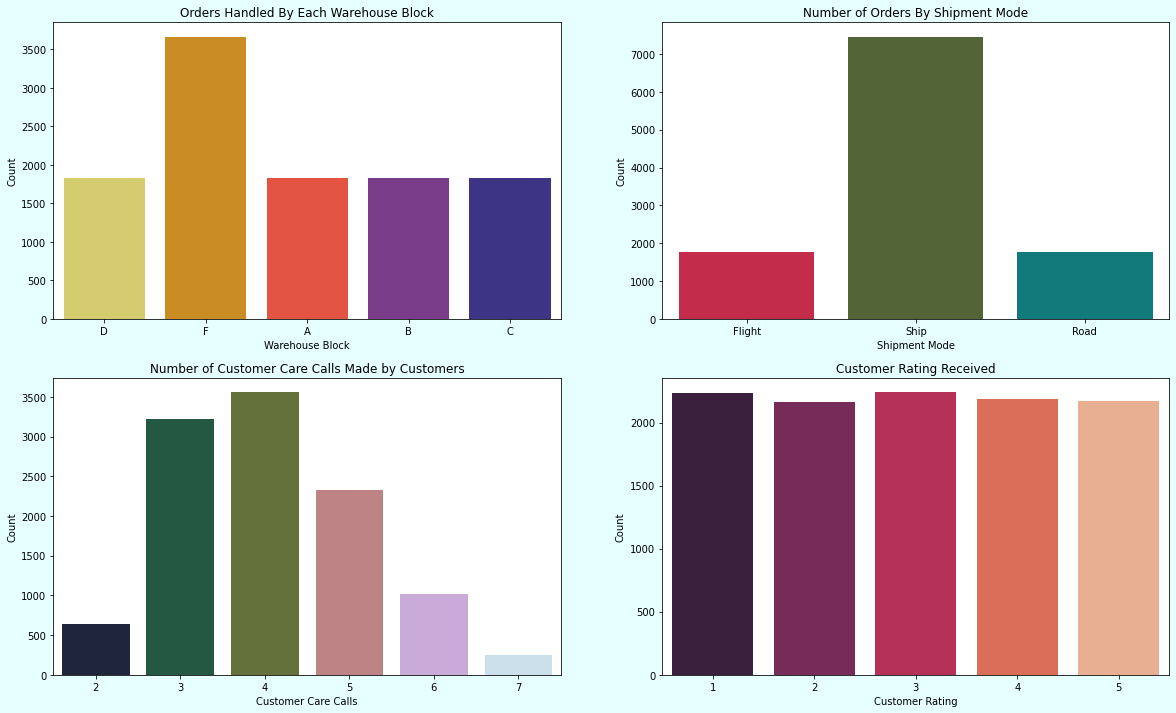

In [14]:
fig, axes = plt.subplots(2,2,figsize=(20,12),facecolor='#e6ffff')
# countplot for 'Warehouse_block'
sns.countplot(x=ecomm["Warehouse_block"], ax=axes[0,0], palette='CMRmap_r')
axes[0,0].set_title('Orders Handled By Each Warehouse Block', fontsize=12)
axes[0,0].set_xlabel('Warehouse Block', fontsize=10)
axes[0,0].set_ylabel('Count', fontsize=10)
# countplot for 'Mode_of_Shipment' 
sns.countplot(x=ecomm["Mode_of_Shipment"], ax=axes[0,1], palette=['#DC143C','#556b2f','#008b8b'])
axes[0,1].set_title('Number of Orders By Shipment Mode', fontsize=12)
axes[0,1].set_xlabel('Shipment Mode', fontsize=10)
axes[0,1].set_ylabel('Count', fontsize=10)
# countplot for 'Customer_care_calls'
sns.countplot(x=ecomm["Customer_care_calls"], ax=axes[1,0],palette='cubehelix')
axes[1,0].set_title('Number of Customer Care Calls Made by Customers', fontsize=12)
axes[1,0].set_xlabel('Customer Care Calls', fontsize=10)
axes[1,0].set_ylabel('Count', fontsize=10)
# countplot for 'Customer_rating'
sns.countplot(x=ecomm["Customer_rating"], ax=axes[1,1],palette="rocket")
axes[1,1].set_title('Customer Rating Received', fontsize=12);
axes[1,1].set_xlabel('Customer Rating', fontsize=10)
axes[1,1].set_ylabel('Count', fontsize=10);

上記のサブプロットから、次のように推論できます。

1. ほとんどの注文は倉庫ブロックFによって処理され、他の倉庫ブロックは残りの注文を等しく処理しました。
1. 注文のほとんどは船で出荷され、次に飛行機で出荷され、最後に道路で出荷されました。
1. 顧客の多くは、貨物を追跡するために4回の電話をかける必要がありました。これは、顧客が数回電話をかける必要なしに、顧客の懸念をできるだけ早く解決する必要があるため、会社にとっての警告点です。
1. 1 は、カウントが <> 番目に高い評価です。これは、製品が時間どおりに配達されないという事実と、顧客が行う1必要のある電話の数が多いことが原因である可能性が高くなります

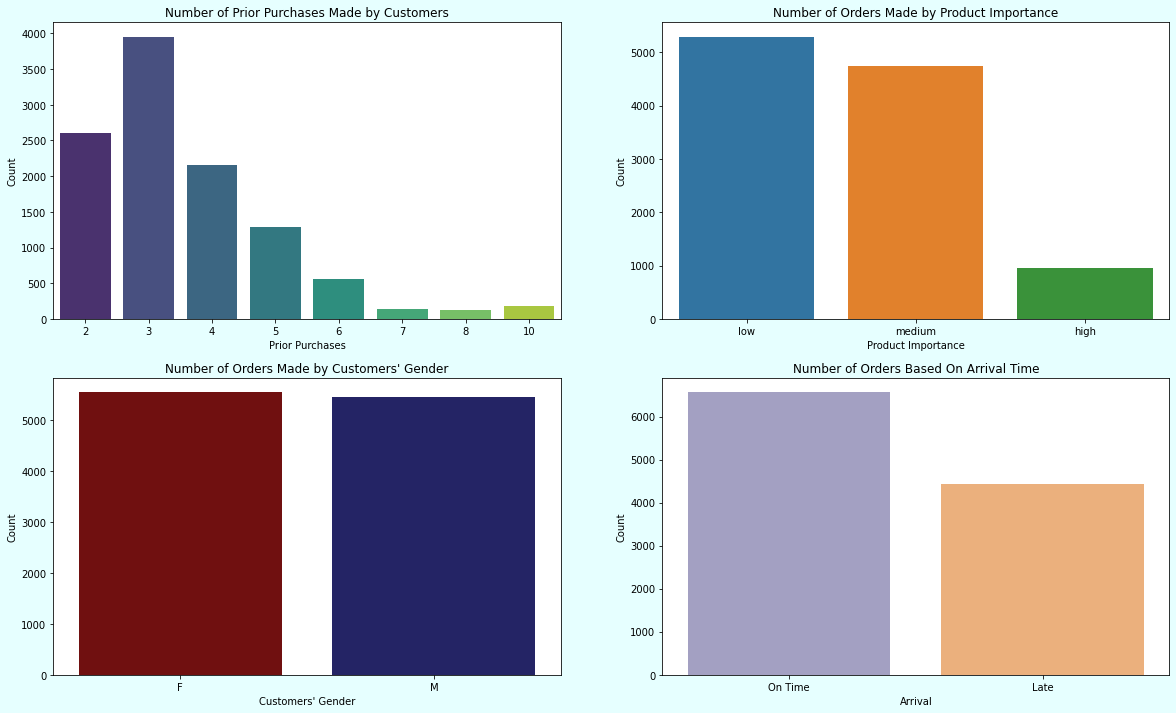

In [17]:
fig, axes = plt.subplots(2,2,figsize=(20,12),facecolor='#e6ffff')
# countplot for 'Prior_purchases'
sns.countplot(x=ecomm["Prior_purchases"],ax=axes[0,0],palette='viridis')
axes[0,0].set_title('Number of Prior Purchases Made by Customers', fontsize=12)
axes[0,0].set_xlabel('Prior Purchases', fontsize=10)
axes[0,0].set_ylabel('Count', fontsize=10)
# countplot for'Product_importance'
abs_priority = ecomm["Product_importance"].value_counts(ascending=False)
sns.countplot(x=ecomm["Product_importance"], order=abs_priority.index,ax=axes[0,1])
axes[0,1].set_title('Number of Orders Made by Product Importance', fontsize=12)
axes[0,1].set_xlabel('Product Importance', fontsize=10)
axes[0,1].set_ylabel('Count', fontsize=10)
# countplot for'Gender'
abs_gender = ecomm["Gender"].value_counts(ascending=False)
sns.countplot(x=ecomm["Gender"], order=abs_gender.index,ax=axes[1,0],palette=['#800000','#191970'])
axes[1,0].set_title("Number of Orders Made by Customers' Gender", fontsize=12)
axes[1,0].set_xlabel("Customers' Gender", fontsize=10)
axes[1,0].set_ylabel('Count', fontsize=10)
# countplot for'Reached.on.Time_Y.N'
abs_arrival = ecomm["Reached.on.Time_Y.N"].value_counts(ascending=False)
sns.countplot(x=ecomm["Reached.on.Time_Y.N"], order=abs_arrival.index,ax=axes[1,1],palette='tab20c_r')
axes[1,1].set_title('Number of Orders Based On Arrival Time', fontsize=12)
axes[1,1].set_xlabel('Arrival', fontsize=10)
axes[1,1].set_xticklabels(['On Time', 'Late'])
axes[1,1].set_ylabel('Count', fontsize=10);

上記のサブプロットから、次のように結論付けることができます。

1. 顧客の多くは以前に3回購入していました。また、以前に少なくとも100回購入した約8人の忠実な顧客がいることもわかりました。
1. ほとんどの注文は重要度が低く、次に中、高が続きます。
1. 10,999件の注文のうち、総注文の半分以上が時間通りに配達されませんでした。

さらに深く掘り下げるために、データについていくつかの質問をして答えることができます。結果は任意の形式になります。以下は、あなたが出てくる可能性のある質問の例です。

>製品の平均コストはいくらですか、そして平均割引は、注文が非常に重要であるが遅れて到着し、顧客が1の評価を与えた顧客に与えられますか?

In [18]:
ecomm[(ecomm['Product_importance']=='high') & (ecomm['Reached.on.Time_Y.N']==1) & (ecomm['Customer_rating']==1)][['Prior_purchases','ID','Discount_offered','Cost_of_the_Product','Customer_rating']].groupby('Customer_rating').agg({'Prior_purchases':'mean','ID':'count','Discount_offered':'mean', 'Cost_of_the_Product':'mean'})

,Prior_purchases,ID,Discount_offered,Cost_of_the_Product
Customer_rating,,,,
1,3.3125,128,21.984375,193.960938


> 重要度の高い製品に与えられる割引の範囲は何ですか?

<AxesSubplot:xlabel='Product_importance', ylabel='Discount_offered'>

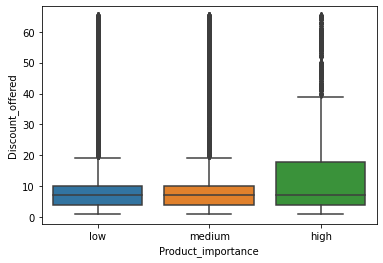

In [19]:
sns.boxplot(x=ecomm['Product_importance'],
            y=ecomm['Discount_offered'])

## フェーズ 3: モデリング
注文が時間どおりに配達されたかどうかを予測するには、列を出力として使用できます。カテゴリデータであるため、論理回帰、K近傍、サポートベクターマシンなどの分類教師あり機械学習アルゴリズムを使用する必要があります。これらのアルゴリズムの適用を開始する前に、カテゴリ変数をダミー変数に変更し、数値変数をスケーリングする必要があります

In [20]:
# create dummy variables for categorical variables
dummy1 = pd.DataFrame(pd.get_dummies(ecomm[['Warehouse_block', 'Mode_of_Shipment','Product_importance','Gender']]))
dummy2 = pd.DataFrame(pd.get_dummies(ecomm[['Customer_care_calls','Customer_rating','Prior_purchases']].astype(str)))
# for normalizing data
from sklearn.preprocessing import scale  
ecomm1 = pd.DataFrame(scale(ecomm[['Cost_of_the_Product','Discount_offered', 'Weight_in_gms']]),columns=['Cost_of_the_Product','Discount_offered', 'Weight_in_gms'])
# create new datafame for modeling 
ecomm2 = pd.concat([ecomm1,dummy1,dummy2,ecomm[['Reached.on.Time_Y.N']]],axis=1)

その後、データをトレーニングデータとテストデータに分割し、必要なMLアルゴリズムライブラリをインポートする必要があります。

In [22]:
!pip install xgboost

You should consider upgrading via the 'c:\python38\python.exe -m pip install --upgrade pip' command.



     ---------------------------------------- 70.9/70.9 MB 6.8 MB/s eta 0:00:00


In [23]:
from sklearn.model_selection import train_test_split
# split data into output and input
X = ecomm2.iloc[:,:-1] # inputs
Y = ecomm2['Reached.on.Time_Y.N'] # outputs
# split data into train data and test data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25,shuffle=True) 
# import classification ML 
import xgboost
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.ensemble import RandomForestClassifier as RT
from sklearn.naive_bayes import GaussianNB as GB  
from sklearn.svm import SVC 

次に、モデルを構築できます

In [24]:
# append different classification models into classifiers array 
classifiers=[]
LR_model = LogisticRegression()
classifiers.append(LR_model)
KNN_model = KNeighborsClassifier(n_neighbors=11, metric='euclidean')
classifiers.append(KNN_model)
DT_model = DT(criterion = 'entropy',max_depth=4) 
classifiers.append(DT_model)
RF_model = RT(n_jobs=2, n_estimators=99, criterion="entropy")
classifiers.append(RF_model)
GNB_model = GB() 
classifiers.append(GNB_model)
SVC_model = SVC(kernel = "linear")
classifiers.append(SVC_model)
XGB_model = xgboost.XGBClassifier()
classifiers.append(XGB_model)

In [27]:
classifiers

[LogisticRegression(),
 KNeighborsClassifier(metric='euclidean', n_neighbors=11),
 DecisionTreeClassifier(criterion='entropy', max_depth=4),
 RandomForestClassifier(criterion='entropy', n_estimators=99, n_jobs=2),
 GaussianNB(),
 SVC(kernel='linear'),
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_st

## フェーズ 4: 評価 
テスト精度に基づいてモデルを選択できます。以下の結果によると、最高のテスト精度が返されたため、最終モデルとして決定木を選択できます。

In [28]:
accuracy_train = []
accuracy_test = []
for clf in classifiers:
    clf.fit(X_train, Y_train)
    pred_train = clf.predict(X_train)
    pred_test = clf.predict(X_test)
    acc_train = accuracy_score(Y_train, pred_train)
    acc_test = accuracy_score(Y_test, pred_test)
    accuracy_train.append(acc_train)
    accuracy_test.append(acc_test)

In [29]:
from sklearn.metrics import accuracy_score
accuracy_result = pd.DataFrame(data={'Model':['LR','KNN','Decision Tree','Random Forest','Gaussian Bayes','SVM','XGB'],
'Training Accuracy':accuracy_train,
'Testing Accuracy':accuracy_test})
accuracy_result.sort_values('Testing Accuracy',ascending=False)

,Model,Training Accuracy,Testing Accuracy
2,Decision Tree,0.695842,0.666545
6,XGB,0.910050,0.661818
3,Random Forest,1.000000,0.661091
5,SVM,0.667232,0.652727
0,LR,0.650139,0.644364
1,KNN,0.734877,0.644000
4,Gaussian Bayes,0.657777,0.629091


デシジョン ツリーをプロットするには、次のコード行を使用できます。お気づきかもしれませんが、私はサブプロットにパラメータを入れるのが好きです。この機能は、サブプロットの背景色を設定するのに役立ちます。16進コード(EDA部分に示されているように)または色名を渡すことができます。

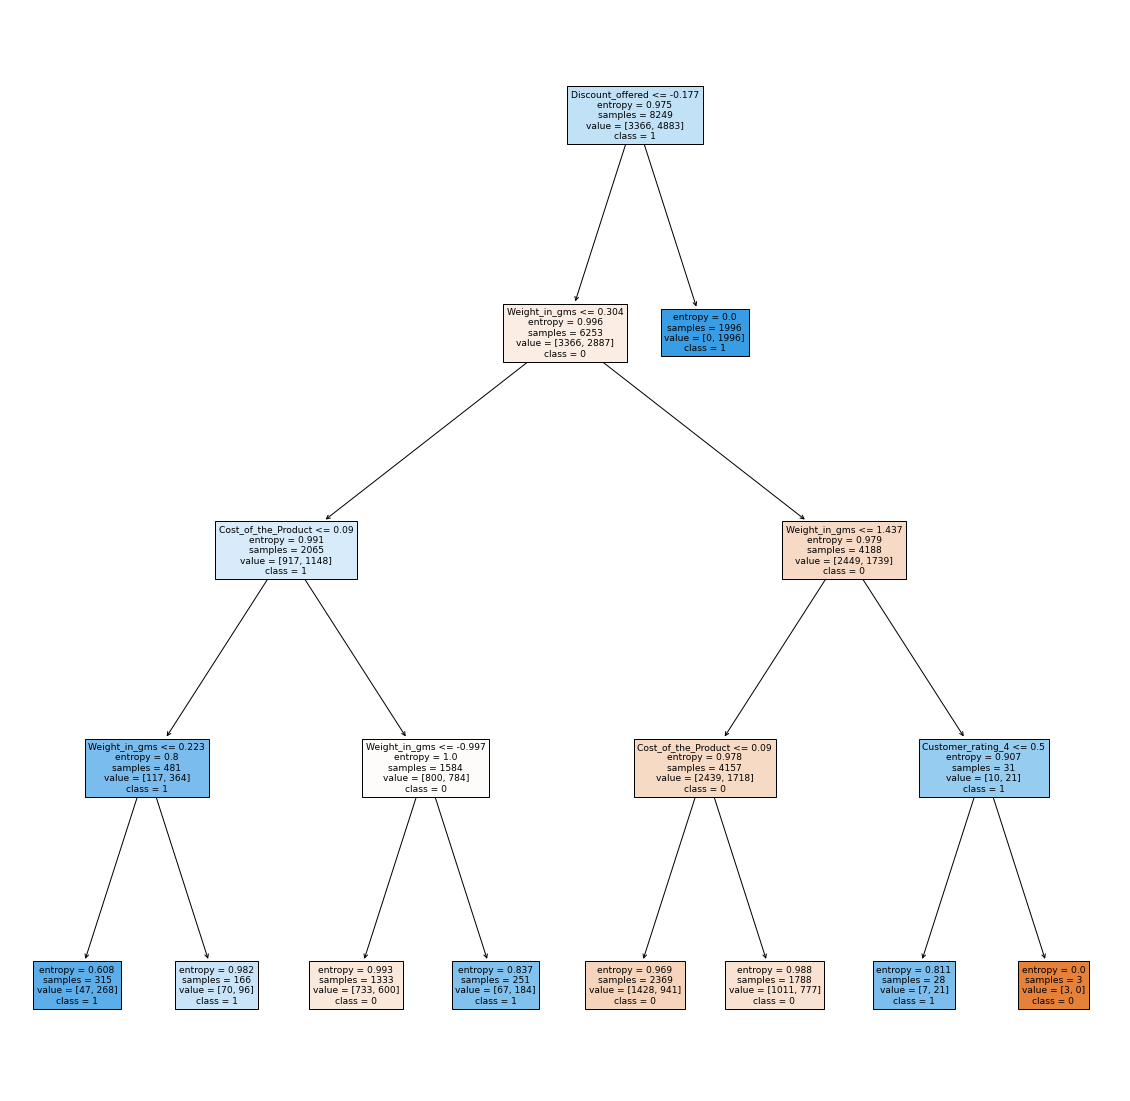

In [30]:
from sklearn import tree
from sklearn.tree import plot_tree
DT_model = DT(criterion = 'entropy',max_depth=4) 
DT_model.fit(X_train,Y_train)
fig, ax = plt.subplots(figsize=(20, 20), facecolor='w')
tree.plot_tree(DT_model,
               feature_names=np.array(X.columns),
               class_names=['0','1'],
               filled=True,
               ax=ax);

以下は、混乱行列のヒートマップを作成する方法です。

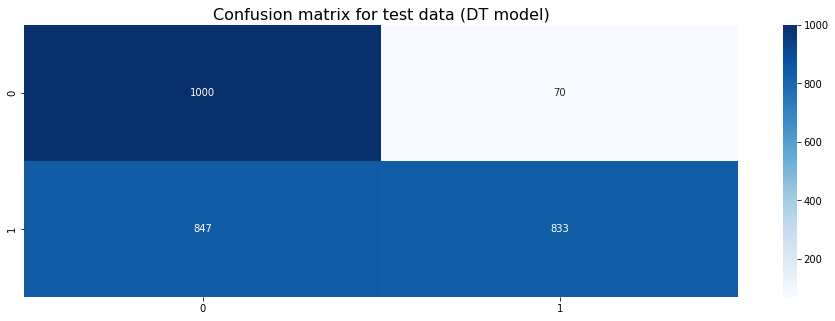

In [32]:
pred_train_DT = DT_model.predict(X_train)
pred_test_DT = DT_model.predict(X_test)

from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,5))
sns.heatmap(confusion_matrix(Y_test,pred_test_DT), annot=True, fmt='', cmap='Blues')
plt.title('Confusion matrix for test data (DT model)',fontsize=16);

## フェーズ 5: 展開 (フラスコ + HTML + CSS を使用) 
展開が必要な理由 すべてのユーザーがコーダーであるとは限らないため、エンドユーザーがJupyterノートブックを実行して出力を取得する方法を知っていることを期待するのは非現実的です。したがって、モデルのデプロイはおそらく ML の最も重要な部分です。

ここでは、具体的な展開については省略しています。原文を参照ください（岩政）